This is an exploratory data analysis of the CAT

In [1]:
import pandas as pd

import matplotlib.pyplot as plt


In [2]:
# Load the new CSV files
current_sheet_pruned = pd.read_csv('data/Current_Sheet.csv')
emissions_limited_pruned = pd.read_csv('data/Emissions_Limited_2040.csv')


Are the list the same?

In [3]:
# Extract the plant taxon lists from each sheet
current_taxa_pruned = set(current_sheet_pruned['Taxon'])
emissions_limited_taxa_pruned = set(emissions_limited_pruned['Taxon'])

# Check if all the lists are the same
all_equal_pruned = current_taxa_pruned == emissions_limited_taxa_pruned

# Find differences between the taxa lists
differences_pruned = {
    "current_vs_emissions_limited_pruned": current_taxa_pruned.symmetric_difference(emissions_limited_taxa_pruned)
}
 
all_equal_pruned, differences_pruned

(True, {'current_vs_emissions_limited_pruned': set()})

How does climate rating move between current ant the SP2 climate model? 

In [5]:
#create a climate_rating_change variable

# Merge the two datasets on the 'Taxon' column to compare climate ratings
merged_df = current_sheet_pruned.merge(emissions_limited_pruned, on='Taxon', suffixes=('_current', '_2040'))

# Compare the climate ratings
merged_df['climate_rating_change'] = merged_df['climate_rating_2040'] - merged_df['climate_rating_current']

# Analyze the direction of change
climate_rating_summary = merged_df['climate_rating_change'].value_counts().sort_index()

# Display summary statistics
climate_rating_stats = merged_df['climate_rating_change'].describe()

# Display the merged DataFrame
#print("Merged DataFrame:")
#print(merged_df)


Merged DataFrame:
                        Taxon status_current  temperature_current  \
0     Abeliophyllum distichum       finished              9.98333   
1          Acaena magellanica       finished              9.98333   
2          Acaena microphylla       finished              9.98333   
3          Acaena myriophylla       finished              9.98333   
4          Acaena pinnatifida       finished              9.98333   
...                       ...            ...                  ...   
3932          Yucca ?schottii        no data                  NaN   
3933       Yucca thompsoniana       finished              9.98333   
3934   Zanthoxylum americanum       finished              9.98333   
3935   Zanthoxylum oxyphyllum       finished              9.98333   
3936          Ziziphus jujuba       finished              9.98333   

      climate_rating_current  median_bioclim_01_current  \
0                       11.0                   10.78260   
1                        9.0       

In [7]:
# Display the summary statistics and value counts
print("\nClimate Rating Change Summary:")
print(climate_rating_summary)
print("\nClimate Rating Change Statistics:")
print(climate_rating_stats)




Climate Rating Change Summary:
climate_rating_change
-9.0       8
-8.0       8
-7.0      35
-6.0     108
-5.0     122
-4.0      95
-3.0     680
-2.0     324
-1.0      99
 0.0    1794
 1.0      20
 2.0     402
 3.0     182
 4.0      23
 5.0       7
 6.0      10
 7.0       6
 8.0       1
 9.0       6
Name: count, dtype: int64

Climate Rating Change Statistics:
count    3930.000000
mean       -0.800254
std         2.330767
min        -9.000000
25%        -3.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: climate_rating_change, dtype: float64


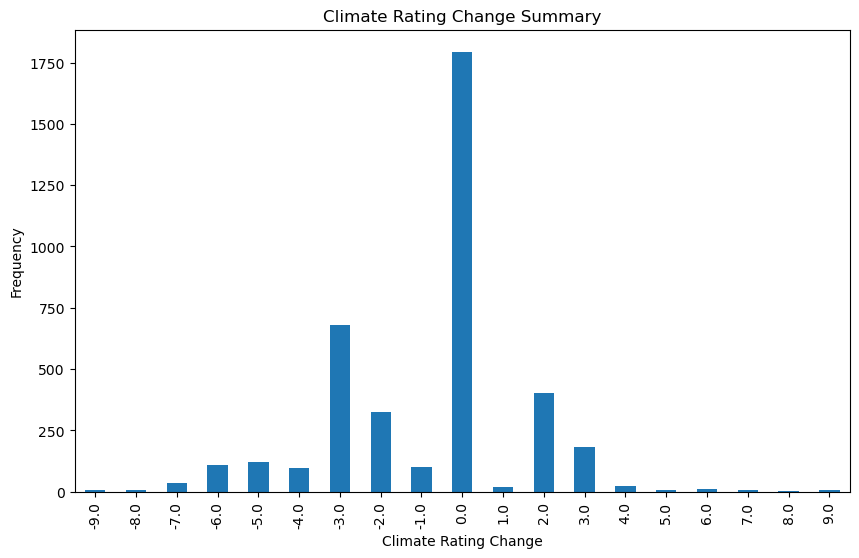

In [6]:
# Optionally, visualize the data
plt.figure(figsize=(10, 6))
climate_rating_summary.plot(kind='bar')
plt.title('Climate Rating Change Summary')
plt.xlabel('Climate Rating Change')
plt.ylabel('Frequency')
plt.show()

In [8]:
# Identify the taxa with the largest changes in climate ratings
largest_changes = merged_df.loc[merged_df['climate_rating_change'].abs().idxmax()]

largest_positive_changes = merged_df.sort_values(by='climate_rating_change', ascending=False).head(10)
largest_negative_changes = merged_df.sort_values(by='climate_rating_change').head(10)

largest_changes, largest_positive_changes[['Taxon', 'climate_rating_current', 'climate_rating_2040', 'climate_rating_change']], largest_negative_changes[['Taxon', 'climate_rating_current', 'climate_rating_2040', 'climate_rating_change']]


(Taxon                                                                              Aria alnifolia
 status_current                                                                           finished
 temperature_current                                                                       9.98333
 climate_rating_current                                                                        9.0
 median_bioclim_01_current                                                                 10.3958
 median_bioclim_05_current                                                                   25.45
 median_bioclim_11_current                                                                   0.825
 median_bioclim_12_current                                                                  1050.5
 median_bioclim_17_current                                                                   127.5
 Tree on BGCI CAT_current                                                                      NaN
 create da

In [11]:
import pandas as pd

# Load the CSV file
file_path = 'data/Current_Sheet.csv'
df = pd.read_csv(file_path)

# Convert observation record columns to numeric, coercing errors to NaN
observation_records_columns = [
    'Observation records', 'Observation records.1', 'Observation records.2', 
    'Observation records.3', 'Observation records.4'
]
df[observation_records_columns] = df[observation_records_columns].apply(pd.to_numeric, errors='coerce')

# Compute the total observations for the current data
df['total_observations_current'] = df[observation_records_columns].sum(axis=1)

# Display the updated DataFrame and summary statistics
print("Updated DataFrame:")
print(df)

# Display summary statistics
print("\nSummary Statistics for Total Observations Current:")
print(df['total_observations_current'].describe())



Updated DataFrame:
                        Taxon    status  temperature  climate_rating  \
0     Abeliophyllum distichum  finished      9.98333            11.0   
1          Acaena magellanica  finished      9.98333             9.0   
2          Acaena microphylla  finished      9.98333            11.0   
3          Acaena myriophylla  finished      9.98333             9.0   
4          Acaena pinnatifida  finished      9.98333            11.0   
...                       ...       ...          ...             ...   
3862          Yucca ?schottii   no data          NaN             NaN   
3863       Yucca thompsoniana  finished      9.98333             9.0   
3864   Zanthoxylum americanum  finished      9.98333            11.0   
3865   Zanthoxylum oxyphyllum  finished      9.98333            11.0   
3866          Ziziphus jujuba  finished      9.98333             9.0   

      median_bioclim_01  median_bioclim_05  median_bioclim_11  \
0              10.78260            26.7000         